# Computer Vision Day 2

## Image Manipulation & Processing

Import Statements

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cv2.__version__

'4.1.1'

In [4]:
def showImg(img,title= ''):
    plt.figure(figsize = (10,5));
    plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def showGrayScaleImg(img,title= ''):
    plt.figure(figsize = (10,5));
    plt.title(title)
    plt.imshow(img, cmap='gray')

## Traslations

In [4]:
img = cv2.imread('Ramon.jpeg')


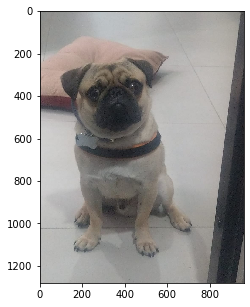

In [5]:
showImg(img)

In [6]:
height, width = img.shape[:2]

In [7]:
translation_matrix = np.float32(
    [
        [1,0,100], # Translation in the x axis
        [0,1,300] # Translation in the y axis
    ])

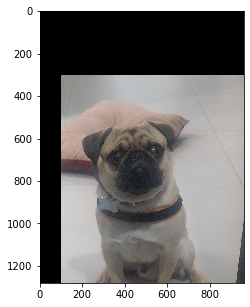

In [8]:
img_translation = cv2.warpAffine(img, translation_matrix,
                                (width,height))
showImg(img_translation)

In [9]:
translation_matrix2 = np.float32(
    [
        [1,0,-100], # Translation in the x axis
        [0,1,-300] # Translation in the y axis
    ])

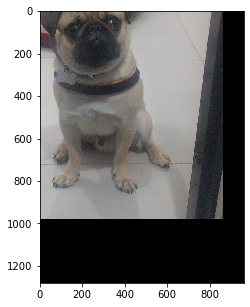

In [10]:
img_translation2 = cv2.warpAffine(img, translation_matrix2,
                                (width,height))
showImg(img_translation2)

### Rotation

In [11]:
x_center = width/2
y_center = height/2
angle_of_rotation = 45 #this change the angle, try 45, 90, 180
scale= 1 # This can change also, try 0.5
rotation_matrix = cv2.getRotationMatrix2D((x_center, y_center), 
                                        angle_of_rotation, scale)

In [12]:
rotation_matrix

array([[   0.70710678,    0.70710678, -311.95959493],
       [  -0.70710678,    0.70710678,  526.86291501]])

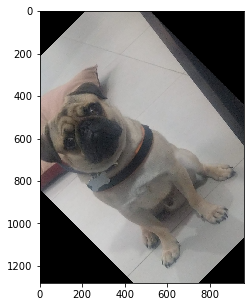

In [13]:
img_rotate = cv2.warpAffine(img, rotation_matrix,
                                (width,height))
showImg(img_rotate)

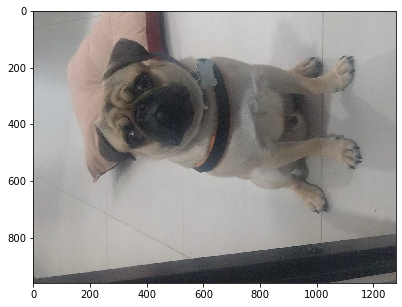

In [14]:
img_rotate = cv2.transpose(img)
showImg(img_rotate)

## Scaling images

### Downsampling

In [15]:
flower = cv2.imread('flower.png')

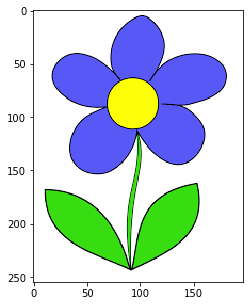

In [16]:
showImg(flower)

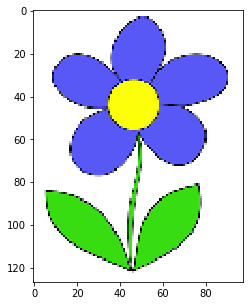

In [17]:
flower_height, flower_witdh = flower.shape[:2]
flower_resized = cv2.resize(flower, (flower_witdh//2, flower_height//2),
                           interpolation=cv2.INTER_NEAREST)
showImg(flower_resized)

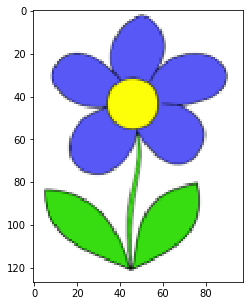

In [18]:
flower_resized = cv2.resize(flower, (flower_witdh//2, flower_height//2),
                           interpolation=cv2.INTER_AREA)
showImg(flower_resized)

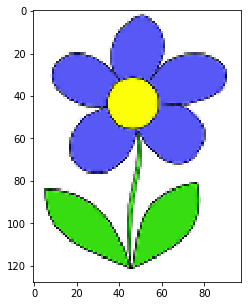

In [19]:
flower_resized = cv2.resize(flower,
                           None,
                           fx=0.5,
                           fy=0.5,
                           interpolation=cv2.INTER_LANCZOS4)
showImg(flower_resized)

#### Prueba con Ramón jajaja

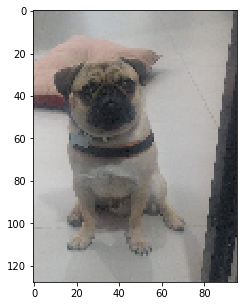

In [20]:
img_resized = cv2.resize(img,
                           None,
                           fx=0.1,
                           fy=0.1,
                           interpolation=cv2.INTER_LANCZOS4)
showImg(img_resized)

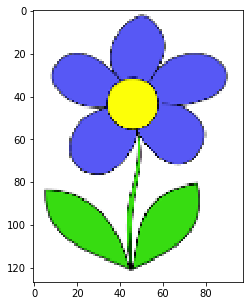

In [21]:
flower_resized = cv2.resize(flower, (flower_witdh//2, flower_height//2),
                           interpolation=cv2.INTER_LINEAR)
showImg(flower_resized)

### Upsampling

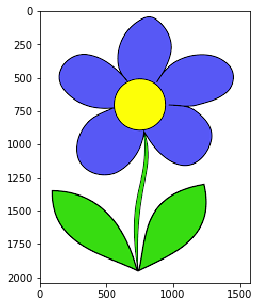

In [22]:
flower_resized = cv2.resize(flower,
                           None,
                           fx=8,
                           fy=8,
                           interpolation=cv2.INTER_AREA)
showImg(flower_resized)

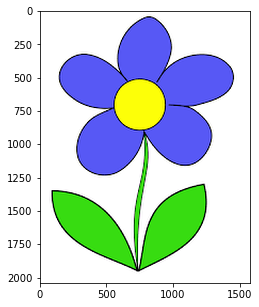

In [23]:
flower_resized = cv2.resize(flower,
                           None,
                           fx=8,
                           fy=8,
                           interpolation=cv2.INTER_LANCZOS4)
showImg(flower_resized)

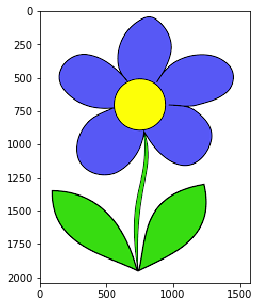

In [24]:
flower_resized = cv2.resize(flower,
                           None,
                           fx=8,
                           fy=8,
                           interpolation=cv2.INTER_AREA)
showImg(flower_resized)

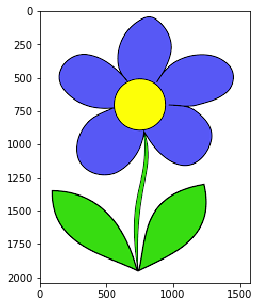

In [25]:
flower_resized = cv2.resize(flower,
                           None,
                           fx=8,
                           fy=8,
                           interpolation=cv2.INTER_NEAREST)
showImg(flower_resized)

### Image Pyramids

#### Gaussian Pyramid (downsamplig)

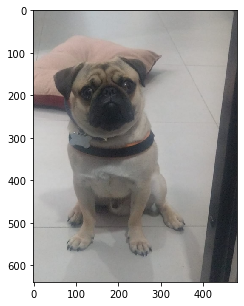

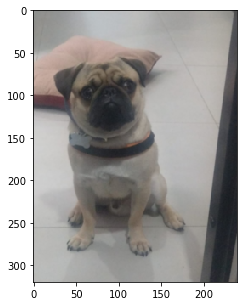

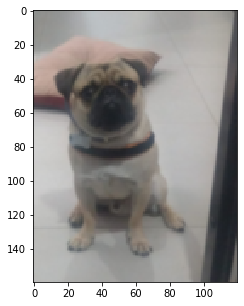

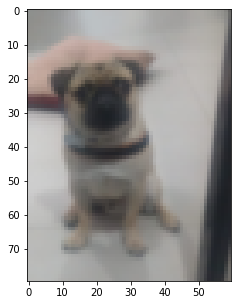

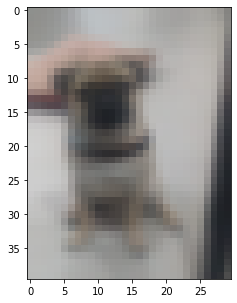

In [26]:
img_copy = img.copy()
for i in range (5):
    img_copy = cv2.pyrDown(img_copy)
    showImg(img_copy)

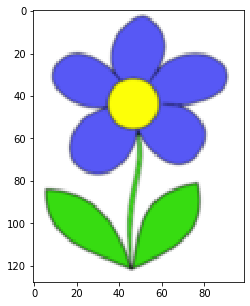

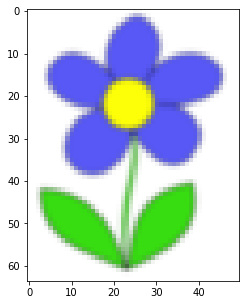

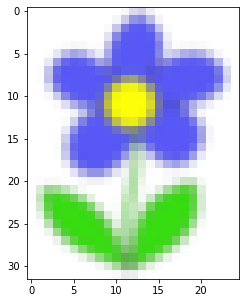

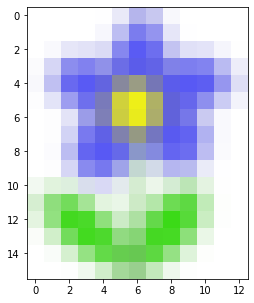

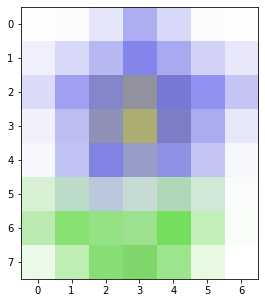

In [27]:
flower_copy = flower.copy()
for i in range (5):
    flower_copy = cv2.pyrDown(flower_copy)
    showImg(flower_copy)

In [28]:
#Esto es lo que hace lo que acabamos de hacer
img_copy = img.copy()
for i in range (5):
    img_copy = cv2.pyrDown(img_copy)
    cv2.imshow('pyr',img_copy)
    cv2.waitKey(3000)
    cv2.destroyAllWindows()

Laplacian pyramid

In [29]:
img_copy = img.copy()
for i in range (2):
    img_copy = cv2.pyrUp(img_copy)
    cv2.imshow('pyr',img_copy)
    cv2.waitKey(3000)
    cv2.destroyAllWindows()

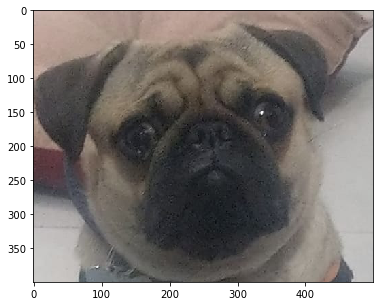

In [30]:
start_row = 200
end_row = 600
start_col = 100
end_col = 600

cropped_img = img[start_row:end_row, start_col:end_col]
showImg(cropped_img)


### Brightened and darked

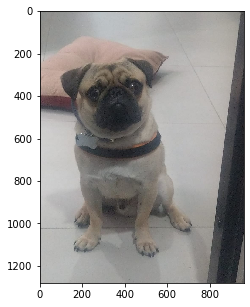

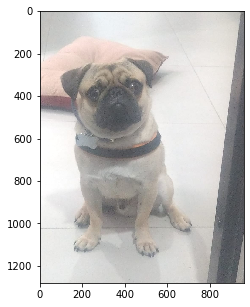

In [31]:
pixel_values_matrix = np.ones(img.shape,dtype='uint8')*50

brightened_img = cv2.add(img,pixel_values_matrix)
showImg(img)
showImg(brightened_img)

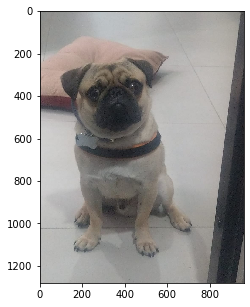

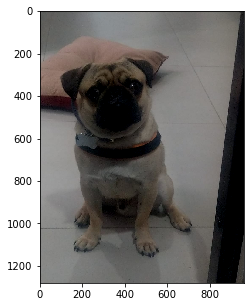

In [32]:
darked_img = cv2.subtract(img,pixel_values_matrix)
showImg(img)
showImg(darked_img)

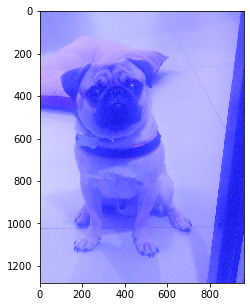

In [33]:
B,G,R = cv2.split(img)

height, width = img.shape[:2]
pixel_values_matrix_one_channel = np.ones((height,width),dtype='uint8')*200

B = cv2.add(B, pixel_values_matrix_one_channel)

modified_img = cv2.merge([B, G, R])
showImg(modified_img)

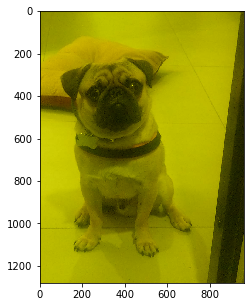

In [34]:
B,G,R = cv2.split(img)

height, width = img.shape[:2]
pixel_values_matrix_one_channel = np.ones((height,width),dtype='uint8')*200

B = cv2.subtract(B, pixel_values_matrix_one_channel)

modified_img = cv2.merge([B, G, R])
showImg(modified_img)

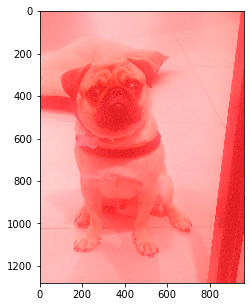

In [35]:
B,G,R = cv2.split(img)

height, width = img.shape[:2]
pixel_values_matrix_one_channel = np.ones((height,width),dtype='uint8')*200

R = cv2.add(R, pixel_values_matrix_one_channel)

modified_img = cv2.merge([B, G, R])
showImg(modified_img)

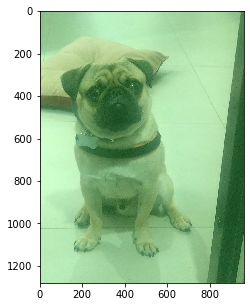

In [36]:
B,G,R = cv2.split(img)

height, width = img.shape[:2]
pixel_values_matrix_one_channel = np.ones((height,width),dtype='uint8')*50

G = cv2.add(G, pixel_values_matrix_one_channel)

modified_img = cv2.merge([B, G, R])
showImg(modified_img)

With HSV I can also do this

## Challenge!!

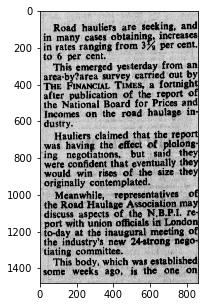

In [37]:
text = cv2.imread('text.png')
showImg(text)

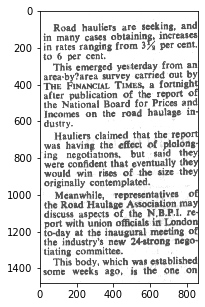

In [38]:
pixel_values_matrix = np.ones(text.shape,dtype='uint8')*80

text2 = cv2.add(text,pixel_values_matrix)
showImg(text2)

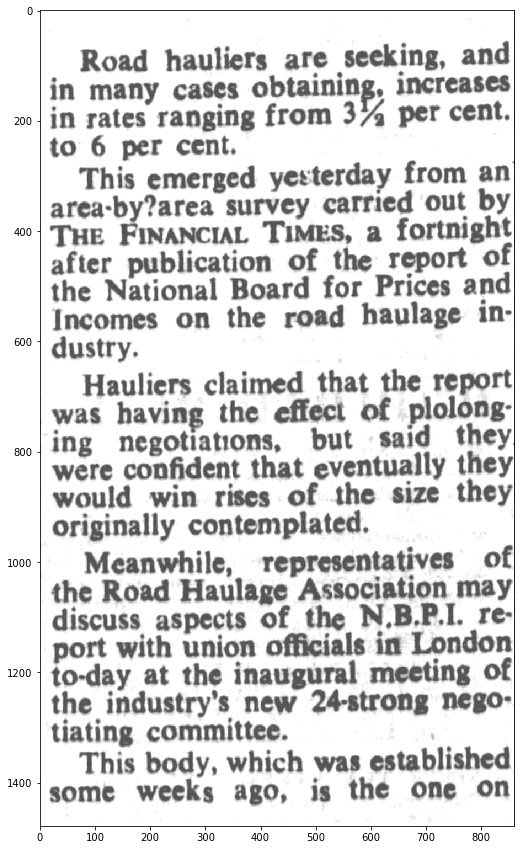

In [39]:
text_hsv = text2
plt.figure(figsize = (20,15))
hsv_img =cv2.cvtColor(text, cv2.COLOR_BGR2HSV)

hue =  hsv_img[:,:,0]
saturation = hsv_img[:,:,1]
value = hsv_img[:,:,2]

plt.imshow(cv2.cvtColor(text_hsv,cv2.COLOR_BGR2RGB));

In [40]:

lower_range = (0,0,90)
upper_range = (0,0,255)
hsv_mask2 = cv2.inRange(hsv_img, lower_range, upper_range)

masked_image2 = np.copy(hsv)
masked_image2[hsv_mask2 == 0 ] = [0,0,0]

showImg(masked_image2)

NameError: name 'hsv' is not defined

## Bitwise operations

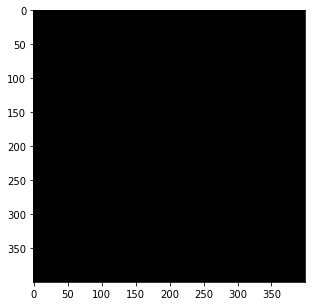

In [41]:
canvas = np.zeros((400,400),np.uint8)
showGrayScaleImg(canvas)

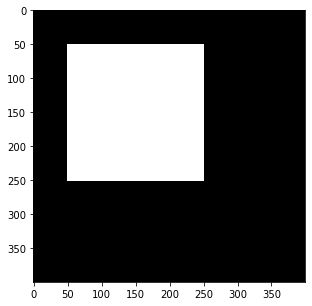

In [42]:
square= canvas.copy()
cv2.rectangle(square,(50,50),(250,250),255,-1)
showGrayScaleImg(square)

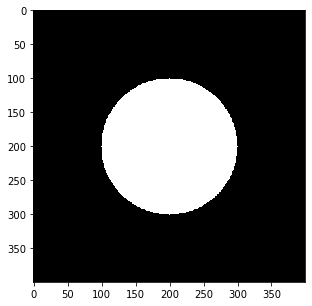

In [43]:
circle= canvas.copy()
cv2.circle(circle,(200,200),100,255,-1)
showGrayScaleImg(circle)

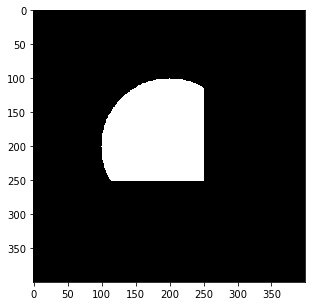

In [44]:
and_operation = cv2.bitwise_and(circle,square)
showGrayScaleImg(and_operation)

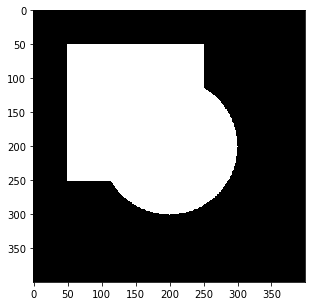

In [45]:
or_operation = cv2.bitwise_or(circle,square)
showGrayScaleImg(or_operation)

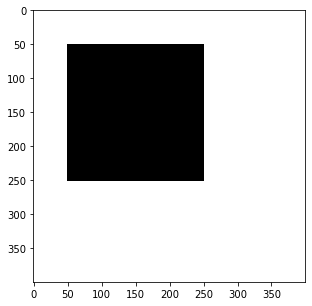

In [46]:
not_operation = cv2.bitwise_not(square)
showGrayScaleImg(not_operation)

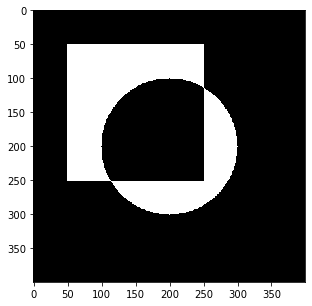

In [47]:
xor_operation = cv2.bitwise_xor(circle,square)
showGrayScaleImg(xor_operation)

### Blur

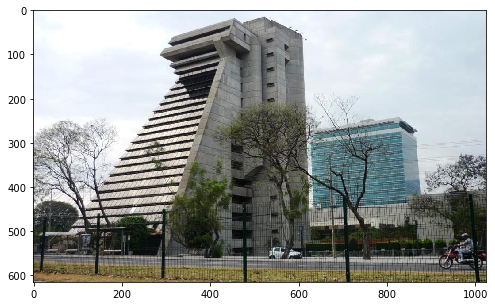

In [48]:
img = cv2.imread('cgr.jpg')
showImg(img)

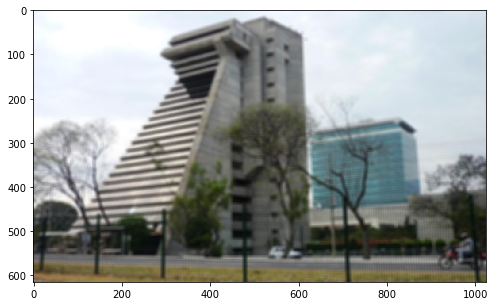

In [49]:
kernel = np.ones((9,9), np.float32)/81  # 5*5 da 25, 9*9 da 81, hay que mantener eso
blur_img = cv2.filter2D(img,-1,kernel)
showImg(blur_img)

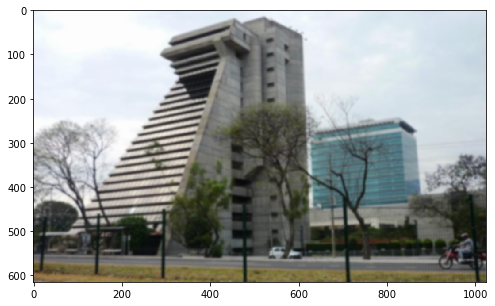

In [50]:
gaussian_blur = cv2.GaussianBlur(img,(11,11),0)
showImg(gaussian_blur)

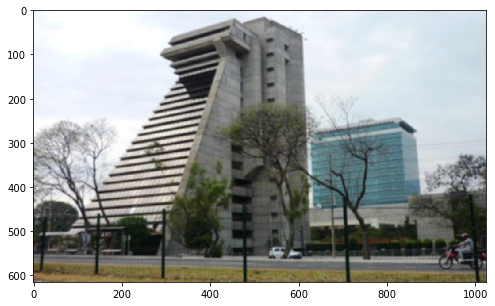

In [51]:
blur = cv2.blur(img,(5,5))
showImg(blur)

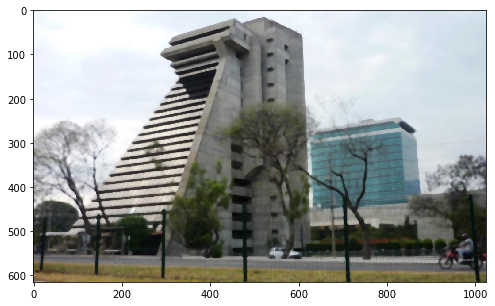

In [52]:
blur_med = cv2.medianBlur(img,7)
showImg(blur_med)

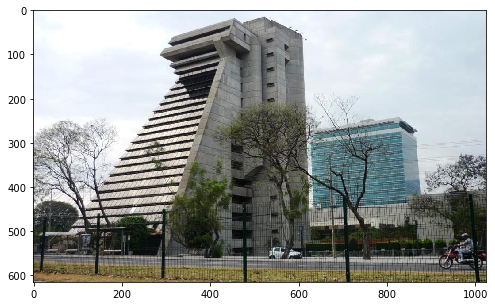

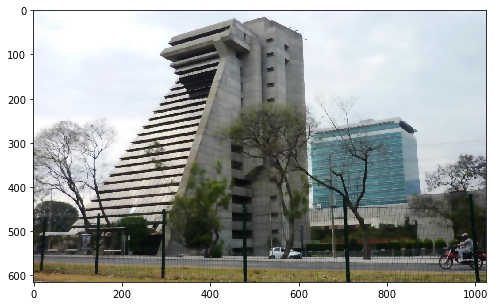

In [53]:
blur_bf = cv2.bilateralFilter(img,9,75,75)
showImg(img)
showImg(blur_bf)

## Sharpening

In [54]:
sharpening_kernel = np.ones ((5,5), np.float32)*-1
sharpening_kernel[2,2]=25
sharpening_kernel

array([[-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., 25., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.]], dtype=float32)

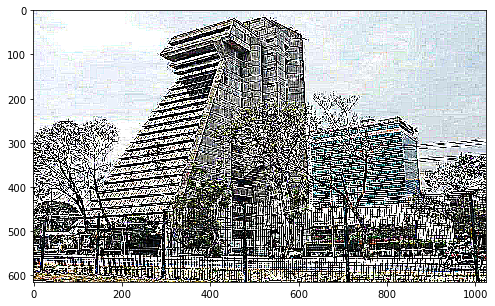

In [55]:
sharp_img= cv2.filter2D(img,-1,sharpening_kernel)
showImg(sharp_img)

In [56]:
sharpening_kernel = np.ones ((5,5), np.float32)*-1
sharpening_kernel[2,2]=24
sharpening_kernel

array([[-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., 24., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.]], dtype=float32)

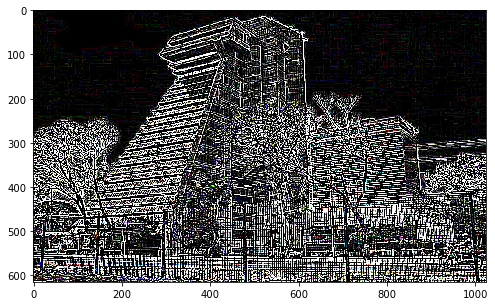

In [57]:
sharp_img= cv2.filter2D(img,-1,sharpening_kernel)
showImg(sharp_img)

In [58]:
sharpening_kernel = np.ones ((3,3), np.float32)*-1
sharpening_kernel[1,1]=9
sharpening_kernel

array([[-1., -1., -1.],
       [-1.,  9., -1.],
       [-1., -1., -1.]], dtype=float32)

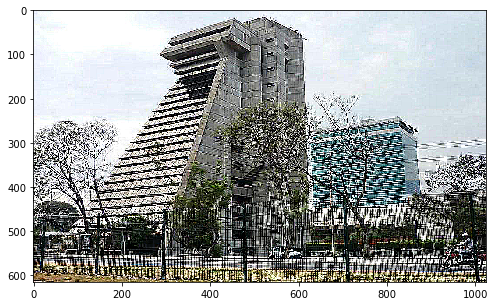

In [59]:
sharp_img= cv2.filter2D(img,-1,sharpening_kernel)
showImg(sharp_img)

In [60]:
sharpening_kernel = np.ones ((7,7), np.float32)*-1
sharpening_kernel[3,3]=49
sharpening_kernel

array([[-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., 49., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.]], dtype=float32)

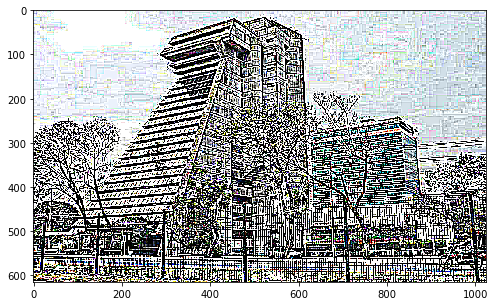

In [61]:
sharp_img= cv2.filter2D(img,-1,sharpening_kernel)
showImg(sharp_img)

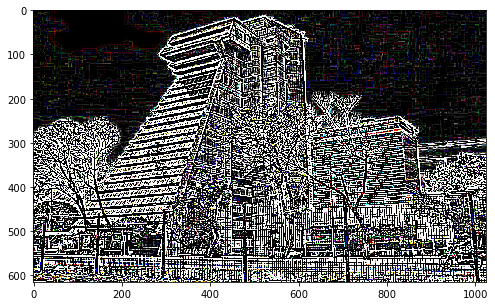

In [62]:
edge_detection_kernel = np.ones ((7,7), np.float32)*-1
edge_detection_kernel[3,3]=48
edge_img= cv2.filter2D(img,-1,edge_detection_kernel)
showImg(edge_img)

### Binarization also known as Thresholding

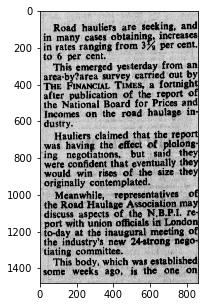

In [63]:
threshold = 127
max_value = 255
text_img = cv2.imread('text.png')
showImg(text_img)

In [64]:
ret1, thresh1 = cv2.threshold(text_img,threshold,max_value,
                             cv2.THRESH_BINARY)

ret2, thresh_binary_inverted = cv2.threshold(text_img,threshold,max_value,
                             cv2.THRESH_BINARY_INV)

ret3, thresh3 = cv2.threshold(text_img,threshold,max_value,
                             cv2.THRESH_TRUNC)

ret4, thresh4 = cv2.threshold(text_img,threshold,max_value,
                             cv2.THRESH_TOZERO)

ret5, thresh5 = cv2.threshold(text_img,threshold,max_value,
                             cv2.THRESH_TOZERO_INV)


In [65]:
print(ret1)
print(ret2)
print(ret3)
print(ret4)
print(ret5)

127.0
127.0
127.0
127.0
127.0


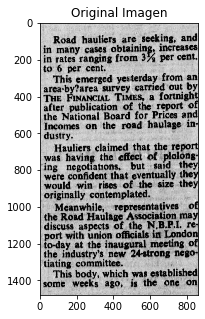

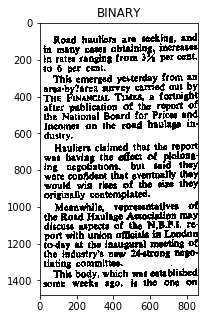

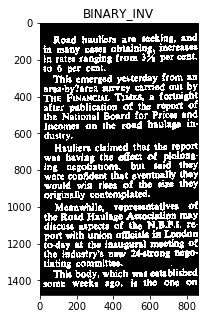

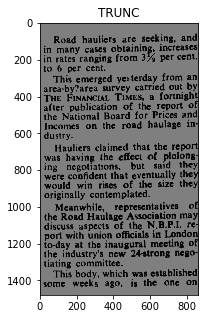

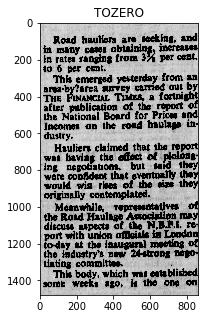

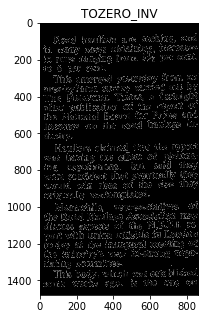

In [66]:
titles = ['Original Imagen','BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [text_img, thresh1, thresh_binary_inverted, thresh3, thresh4, thresh5]
for i in range(6):
    showImg(images[i],titles[i])

In [67]:
th2 = cv2.adaptiveThreshold(text_img,255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 31,45)

th3 = cv2.adaptiveThreshold(text_img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRES_BINARY, 31,45)

titles = ['ADAPTATIVE_THRESH_MEAN_C','ADAPTATIVE_THRESH_GAUSSIAN_C']
images = [th2,th3]
for i in range(6):
    showImg(images[i],titles[i])
                           


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\thresh.cpp:1524: error: (-215:Assertion failed) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function 'cv::adaptiveThreshold'


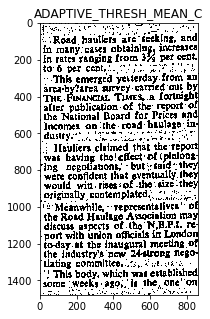

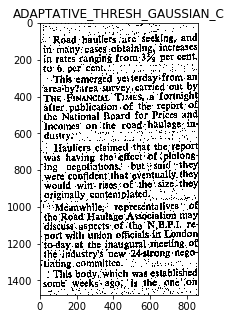

In [68]:
grayscale_text_img = cv2.cvtColor(text_img,cv2.COLOR_BGR2GRAY)

th2 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 31,10)

th3 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 31,10)

titles = ['ADAPTIVE_THRESH_MEAN_C','ADAPTATIVE_THRESH_GAUSSIAN_C']
images = [th2,th3]
for i in range(2):
    showGrayScaleImg(images[i],titles[i])

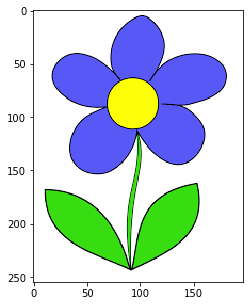

In [69]:
threshold = 127
max_value = 255
text_img = cv2.imread('flower.png')
showImg(text_img)

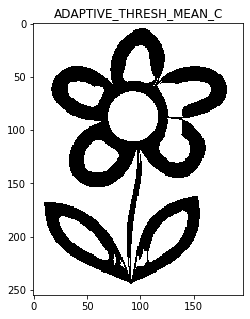

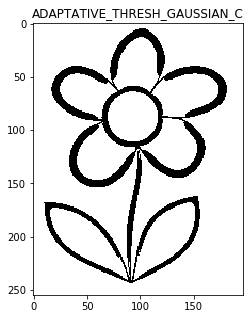

In [70]:
grayscale_text_img = cv2.cvtColor(text_img,cv2.COLOR_BGR2GRAY)

th2 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 31,10)

th3 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 31,10)

titles = ['ADAPTIVE_THRESH_MEAN_C','ADAPTATIVE_THRESH_GAUSSIAN_C']
images = [th2,th3]
for i in range(2):
    showGrayScaleImg(images[i],titles[i])

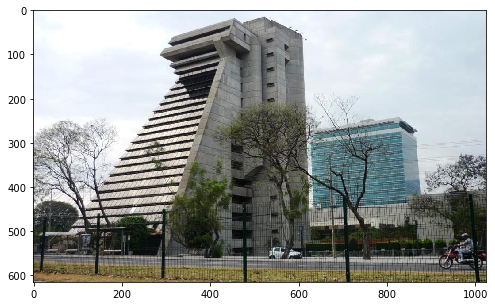

In [71]:
threshold = 127
max_value = 255
text_img = cv2.imread('cgr.jpg')
showImg(text_img)

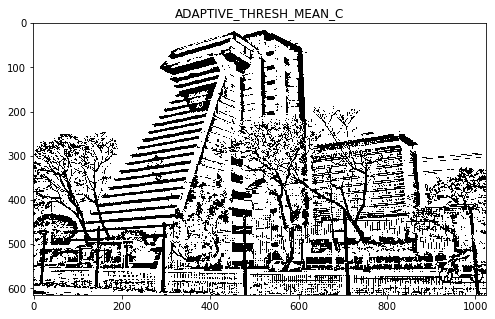

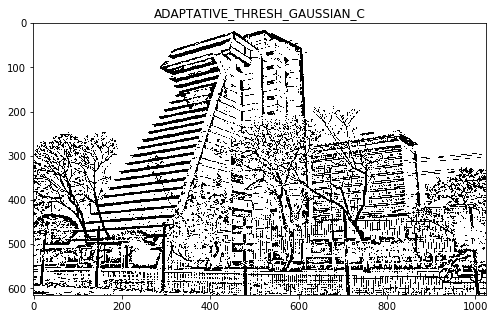

In [72]:
grayscale_text_img = cv2.cvtColor(text_img,cv2.COLOR_BGR2GRAY)

th2 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 31,10)

th3 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 31,10)

titles = ['ADAPTIVE_THRESH_MEAN_C','ADAPTATIVE_THRESH_GAUSSIAN_C']
images = [th2,th3]
for i in range(2):
    showGrayScaleImg(images[i],titles[i])

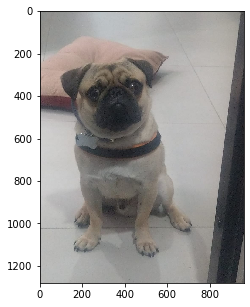

In [73]:
threshold = 127
max_value = 255
text_img = cv2.imread('Ramon.jpeg')
showImg(text_img)

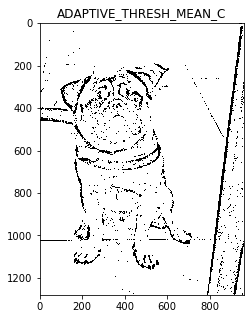

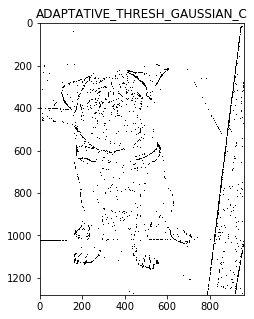

In [74]:
grayscale_text_img = cv2.cvtColor(text_img,cv2.COLOR_BGR2GRAY)

th2 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 31,10)

th3 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, 31,10)

titles = ['ADAPTIVE_THRESH_MEAN_C','ADAPTATIVE_THRESH_GAUSSIAN_C']
images = [th2,th3]
for i in range(2):
    showGrayScaleImg(images[i],titles[i])

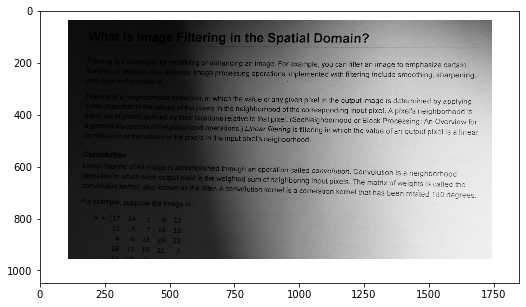

In [75]:
threshold = 127
max_value = 255
text_img = cv2.imread('notes.png')
showImg(text_img)

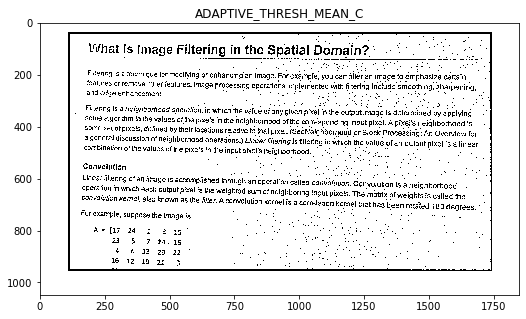

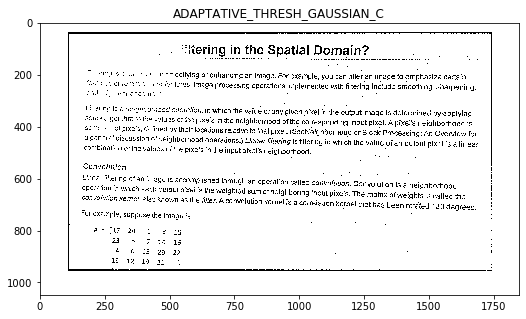

In [76]:
grayscale_text_img = cv2.cvtColor(text_img,cv2.COLOR_BGR2GRAY)

th2 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY,15,4)

th3 = cv2.adaptiveThreshold(grayscale_text_img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY,15,6)

titles = ['ADAPTIVE_THRESH_MEAN_C','ADAPTATIVE_THRESH_GAUSSIAN_C']
images = [th2,th3]
for i in range(2):
    showGrayScaleImg(images[i],titles[i])

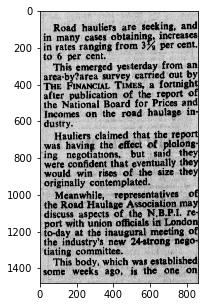

In [77]:
text_img = cv2.imread('text.png')
showImg(text_img)

133.0
133.0


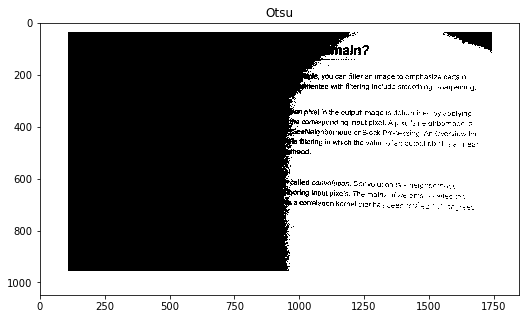

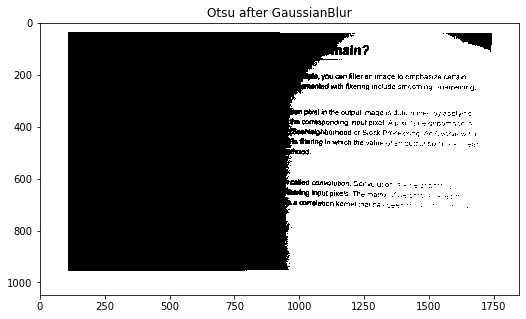

In [78]:
#Otsu's thresholding

ret2, otsu = cv2.threshold(grayscale_text_img,255,255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(grayscale_text_img,(5,5),0)

ret3, otsu_gaussianblur = cv2.threshold(blur, 0,255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(ret3)
print(ret2)

titles = ['Otsu','Otsu after GaussianBlur']

images = [otsu, otsu_gaussianblur]
for i in range(2):
    showGrayScaleImg(images[i],titles[i])

In [79]:
kernel = np.ones((3,3), np.uint8)
dilated_text = cv2.dilate(text_img, kernel, iterations = 2)

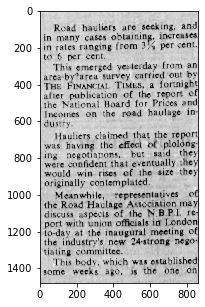

In [80]:
showImg(dilated_text)

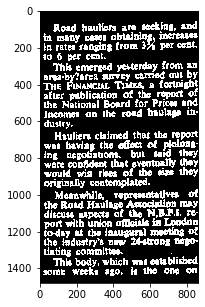

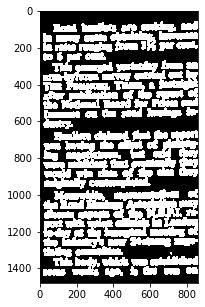

In [81]:
showImg(thresh_binary_inverted)
dilated_text = cv2.dilate(thresh_binary_inverted, kernel, iterations = 3)
showImg(dilated_text)

### Erosion

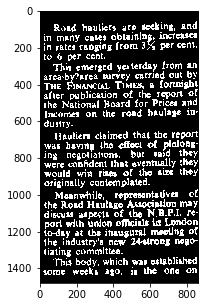

In [82]:
eroded_text = cv2.erode(thresh_binary_inverted, kernel, iterations = 1)
showImg(eroded_text)

## Morphological transformations: Opening / closing

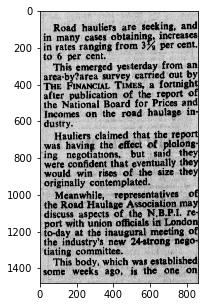

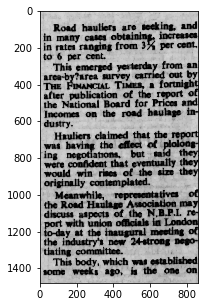

In [83]:
# showImg(text_image)

opening = cv2.morphologyEx(text_img, cv2.MORPH_OPEN, kernel, iterations = 3)
showImg(text_img)
showImg(opening)

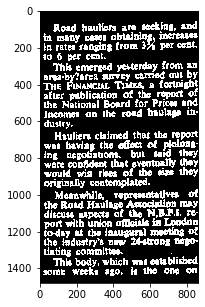

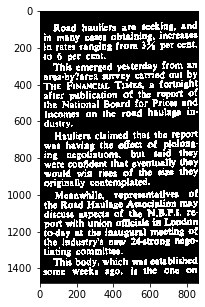

In [84]:
showImg(thresh_binary_inverted)
opening = cv2.morphologyEx(thresh_binary_inverted,
                          cv2.MORPH_OPEN,
                          kernel,
                          iterations = 2)
showImg(opening)

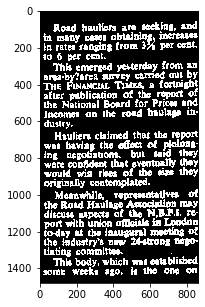

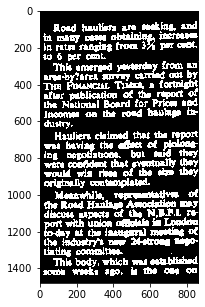

In [85]:
showImg(thresh_binary_inverted)
closing = cv2.morphologyEx(thresh_binary_inverted,
                          cv2.MORPH_CLOSE,
                          kernel,
                          iterations = 2)
showImg(closing)

### Edge detection

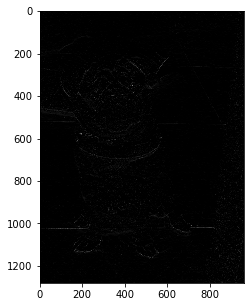

In [86]:
img = cv2.imread('Ramon.jpeg')
grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

scale = 1
delta = 0
x_orientation = 1
y_orientation = 0

ddepth = cv2.CV_16U
edges = cv2.Sobel(grayscale_img,
                 ddepth,
                 0,
                 1,
                 ksize=3,
                 scale=scale,
                 delta=delta,
                 borderType=cv2.BORDER_DEFAULT)
showGrayScaleImg(edges)

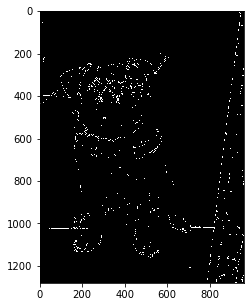

In [87]:
#showImg(gaussian_blur)
edges = cv2.Canny(grayscale_img,50,150)
showGrayScaleImg(edges)

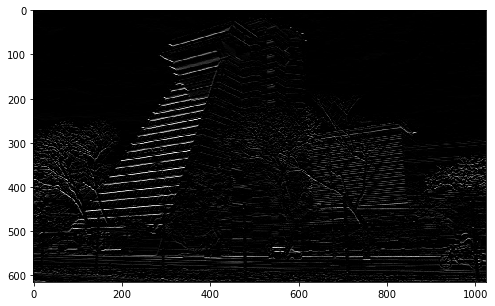

In [88]:
img = cv2.imread('cgr.jpg')
grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

scale = 1
delta = 0
x_orientation = 1
y_orientation = 0

ddepth = cv2.CV_16U
edges = cv2.Sobel(grayscale_img,
                 ddepth,
                 0,
                 1,
                 ksize=3,
                 scale=scale,
                 delta=delta,
                 borderType=cv2.BORDER_DEFAULT)
showGrayScaleImg(edges)

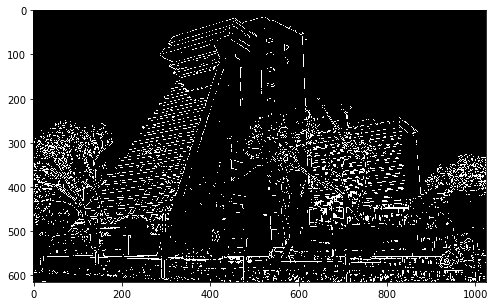

In [89]:
#showImg(gaussian_blur)
edges = cv2.Canny(grayscale_img,200,255)
showGrayScaleImg(edges)

### Perspective

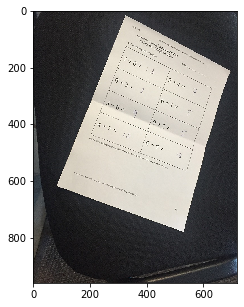

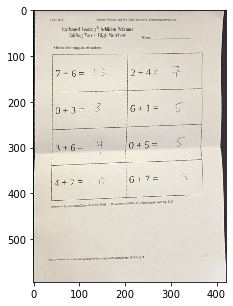

In [90]:
image=cv2.imread('scan.jpg')

showImg(image)

#Cordinates of the 4 corners of the original image

points_A = np.float32([[320,15],[700,215],[85,610],[530,780]])

#Cordinates of the 4 corners of the desired output
#We use a ratio of an A4 paper 1 : 1.41
points_B = np.float32([[0,0],[420,0],[0,594],[420,594]])

#Use the two sets of four points to compute
# the perspective transformation matrix, M

M = cv2.getPerspectiveTransform(points_A, points_B)

warped = cv2.warpPerspective(image, M, (420,594))

showImg(warped)

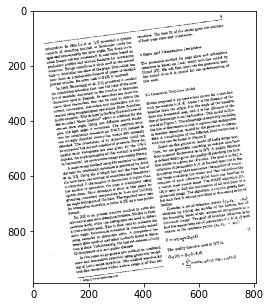

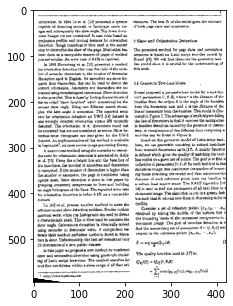

In [91]:
image=cv2.imread('skew_page.png')

showImg(image)

#Cordinates of the 4 corners of the original image

points_A = np.float32([[20,100],[700,10],[150,1000],[800,920]])

#Cordinates of the 4 corners of the desired output
#We use a ratio of an A4 paper 1 : 1.41
points_B = np.float32([[0,0],[420,0],[0,594],[420,594]])

#Use the two sets of four points to compute
# the perspective transformation matrix, M

M = cv2.getPerspectiveTransform(points_A, points_B)

warped = cv2.warpPerspective(image, M, (420,594))

showImg(warped)

## Handwriting recognition

1.  Write a one digit number (from 0 to 9) on a paper and using your mobile photo take a picture of it
2. Crop the image manually and pass it to a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well

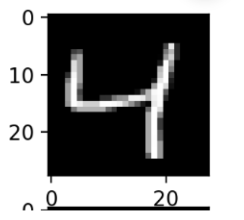

3. Pass it throught a MINST classifier and print the prediction on screen
4.  Modify the image so now it also contains the predict result on the image 
5. Try it with all digits

### Handwriting recognition

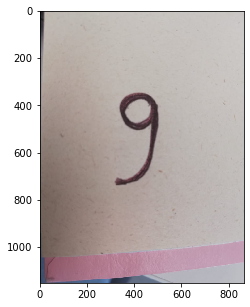

In [128]:
num=cv2.imread('num.jpeg')

showImg(num)

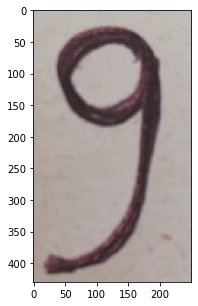

In [129]:
start_row = 320
end_row = 750
start_col = 300
end_col = 550

cropped_num = num[start_row:end_row, start_col:end_col]
showImg(cropped_num)

In [130]:
threshold = 127
max_value = 255

ret2, thresh_binary_inverted = cv2.threshold(cropped_num,threshold,max_value,
                             cv2.THRESH_BINARY_INV)

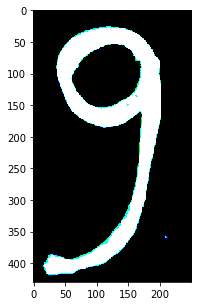

In [131]:
showImg(thresh_binary_inverted)

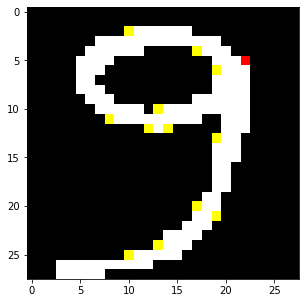

In [132]:
num_height, num_witdh = thresh_binary_inverted.shape[:2]
thresh_binary_inverted_resized = cv2.resize(thresh_binary_inverted, (28,28),
                           interpolation=cv2.INTER_NEAREST)
showGrayScaleImg(thresh_binary_inverted_resized)

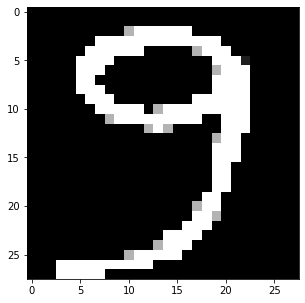

In [133]:
gray_num = cv2.cvtColor(thresh_binary_inverted_resized,cv2.COLOR_BGR2GRAY)
showGrayScaleImg(gray_num)

In [12]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2764 - acc: 0.9143 - val_loss: 0.0626 - val_acc: 0.9797
Test loss: 0.06263826141804457
Test accuracy: 0.9797


In [134]:
img = np.resize(gray_num, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)
y_pred = model.predict_classes(im2arr)
print(y_pred)

[7]


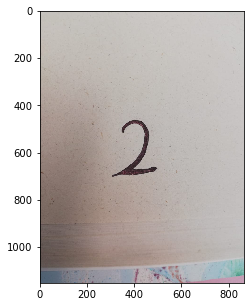

In [100]:
num=cv2.imread('number.jpeg')
showImg(num)

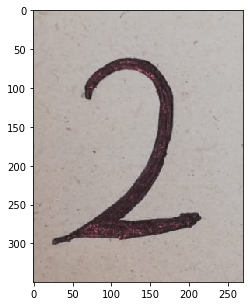

In [101]:
start_row = 400
end_row = 750
start_col = 280
end_col = 550

cropped_num = num[start_row:end_row, start_col:end_col]
showImg(cropped_num)

In [102]:
cv2.imwrite('number2.png',cropped_num)

True

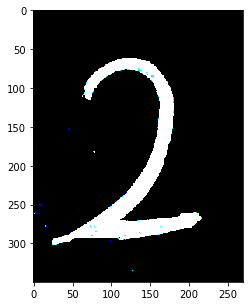

In [103]:
threshold = 127
max_value = 255

ret2, thresh_binary_inverted = cv2.threshold(cropped_num,threshold,max_value,
                             cv2.THRESH_BINARY_INV)

showImg(thresh_binary_inverted)

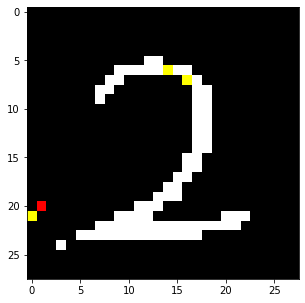

In [104]:
num_height, num_witdh = thresh_binary_inverted.shape[:2]
thresh_binary_inverted_resized = cv2.resize(thresh_binary_inverted, (28,28),
                           interpolation=cv2.INTER_NEAREST)
showGrayScaleImg(thresh_binary_inverted_resized)

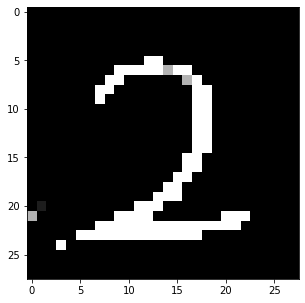

In [105]:
gray_num = cv2.cvtColor(thresh_binary_inverted_resized,cv2.COLOR_BGR2GRAY)
showGrayScaleImg(gray_num)

In [106]:
cv2.imwrite('number2_proc.png',gray_num)

True

In [107]:
img = np.resize(gray_num, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)
y_pred = model.predict_classes(im2arr)
print(y_pred)

[2]


# Artistic live art app
1. Create a function that given an image it creates and saves to disk a version of the image that looks similar to the example below.
2. Create another function that applies the same image transformation but this time it does it in real time using your webcam
3. Create a different effect and apply it to your live webcam stream

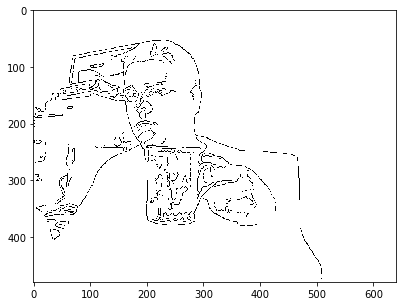

In [108]:
art=cv2.imread('ex2.png')
showImg(art)

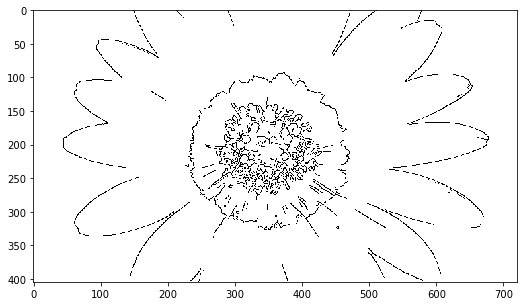

In [109]:
def art (image):
    img = cv2.imread(image)
    image = img.copy()
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,100,150)*-1
    showGrayScaleImg(edges)
    

art('flower.jpg')

In [ ]:

cap = cv2.VideoCapture(0)

while(True):
    #capture frame-by-frame
    ret, frame = cap.read()
    
    #Our operations on the frame come here
    #img = frame
    img = cv2.Canny(frame, cv2.COLOR_BGR2GRAY, 100,150)
    
    
    #Display de resulting frame
    cv2.imshow('Video from OpenCV!, press \'q\' to close', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#when everything done, release the capture
cap.release()
cv2.destroyAllWindows()

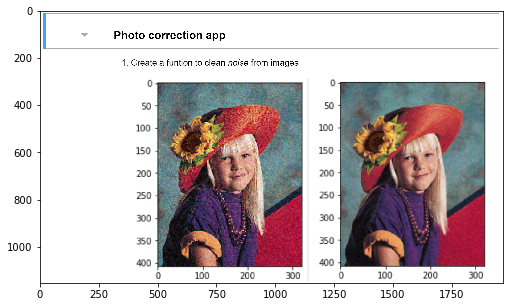

In [110]:
ex3=cv2.imread('ex3.png')

showImg(ex3)

## Processed ones

In [10]:
num0=cv2.imread('Processed/0.jpg')
num1=cv2.imread('Processed/1.jpg')
num2=cv2.imread('Processed/2.jpg')
num3=cv2.imread('Processed/3.jpg')
num4=cv2.imread('Processed/4.jpg')
num5=cv2.imread('Processed/4.png')
num6=cv2.imread('Processed/5.jpg')
num7=cv2.imread('Processed/6.jpg')
num8=cv2.imread('Processed/7.jpg')
num9=cv2.imread('Processed/8.jpg')
num10=cv2.imread('Processed/9.jpg')
num12=cv2.imread('Processed/fideo.jpg')
num13=cv2.imread('Processed/mnist_processed_ns.png')
num14=cv2.imread('Processed/number2_proc.png')
num15=cv2.imread('Processed/seih.jpg')
num16=cv2.imread('Processed/seven_processed.png')
num17=cv2.imread('Processed/treh.jpg')


[2]


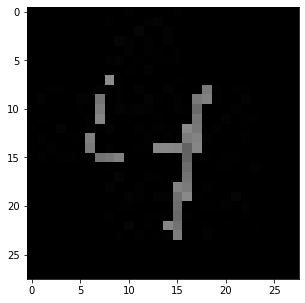

In [13]:
# Number0
showGrayScaleImg(num0)
img0 = np.resize(num0, (28,28,1))
im2arr0 = np.array(img0)
im2arr0= im2arr0.reshape(1,28,28,1)
y_pred0 = model.predict_classes(im2arr0)
print(y_pred0)


[2]


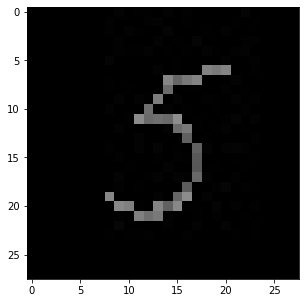

In [14]:
# Number1
showGrayScaleImg(num1)
img1 = np.resize(num1, (28,28,1))
im2arr1 = np.array(img1)
im2arr1= im2arr1.reshape(1,28,28,1)
y_pred1 = model.predict_classes(im2arr1)
print(y_pred1)

[2]


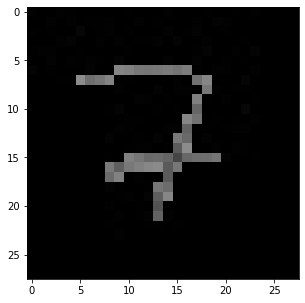

In [19]:
# Number2
showGrayScaleImg(num2)
img2 = np.resize(num2, (28,28,1))
im2arr2 = np.array(img2)
im2arr2= im2arr2.reshape(1,28,28,1)
y_pred2 = model.predict_classes(im2arr2)
print(y_pred2)

[3]


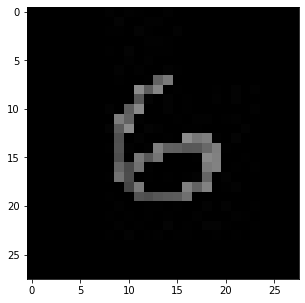

In [18]:
# Number3
showGrayScaleImg(num3)
img3 = np.resize(num3, (28,28,1))
im2arr3 = np.array(img3)
im2arr3= im2arr3.reshape(1,28,28,1)
y_pred3 = model.predict_classes(im2arr3)
print(y_pred3)

[2]


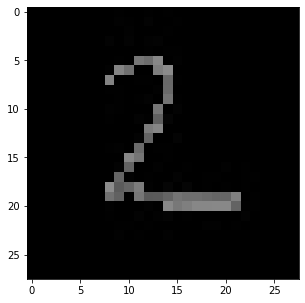

In [17]:
# Number4
showGrayScaleImg(num4)
img4 = np.resize(num4, (28,28,1))
im2arr4 = np.array(img4)
im2arr4= im2arr4.reshape(1,28,28,1)
y_pred4 = model.predict_classes(im2arr4)
print(y_pred4)

[0]


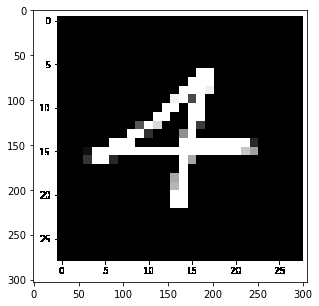

In [22]:
# Number5
showGrayScaleImg(num5)
img5 = np.resize(num5, (28,28,1))
im2arr5 = np.array(img5)
im2arr5 = im2arr5.reshape(1,28,28,1)
y_pred5 = model.predict_classes(im2arr5)
print(y_pred5)

[3]


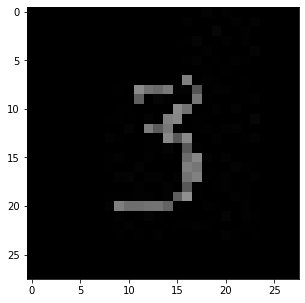

In [21]:
# Number6
showGrayScaleImg(num6)
img6 = np.resize(num6, (28,28,1))
im2arr6 = np.array(img6)
im2arr6 = im2arr6.reshape(1,28,28,1)
y_pred6 = model.predict_classes(im2arr6)
print(y_pred6)

[2]


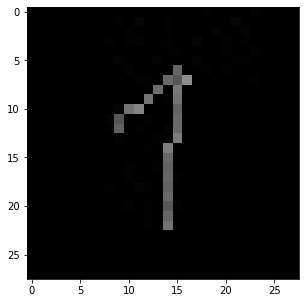

In [23]:
# Number7
showGrayScaleImg(num7)
img7 = np.resize(num7, (28,28,1))
im2arr7 = np.array(img7)
im2arr7 = im2arr7.reshape(1,28,28,1)
y_pred7 = model.predict_classes(im2arr7)
print(y_pred7)

[3]


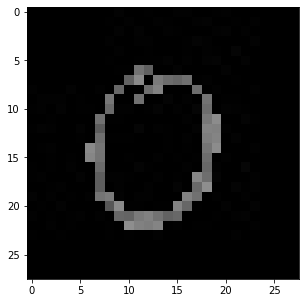

In [24]:
# Number8
showGrayScaleImg(num8)
img8 = np.resize(num8, (28,28,1))
im2arr8 = np.array(img8)
im2arr8 = im2arr8.reshape(1,28,28,1)
y_pred8 = model.predict_classes(im2arr8)
print(y_pred8)

## Original Ones